# Δημιουργία διαγράμματος pie chart για την απεικόνηση ποσοστών ανα χρήση γης μιας καμμένης περιοχής 

## Εισαγωγή βιβλιωθηκών

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec  # Import GridSpec
import os

## Λεξικό με τις κατηγορίες του Corine Land Cover
Κωδικός , Χρώμα, Όνομα κατηγορίας

In [24]:
# Δημιουργία ενός λεξικού που αντιστοιχίζει αριθμούς με χρώματα σε μορφή HEX
CLC_number_to_legend_color = {
    111: ("#e6004d", "Continuous urban fabric"),
    112: ("#ff0000", "Discontinuous urban fabric"),
    121: ("#cc4df2", "Industrial or commercial units"),
    122: ("#cc0000", "Road and rail networks and associated land"),
    123: ("#e6004d", "Port areas"),
    124: ("#e6cce6", "Airports"),
    131: ("#a600cc", "Mineral extraction sites"),
    132: ("#a64d00", "Dump sites"),
    133: ("#ff4dff", "Construction sites"),
    141: ("#ffa6ff", "Green urban areas"),
    142: ("#ffe6ff", "Sport and leisure facilities"),
    211: ("#ffffa8", "Non-irrigated arable land"),
    212: ("#ffff00", "Permanently irrigated land"),
    213: ("#e6e600", "Rice fields"),
    221: ("#e68000", "Vineyards"),
    222: ("#f2a64d", "Fruit trees and berry plantations"),
    223: ("#e6a600", "Olive groves"),
    231: ("#e6e64d", "Pastures"),
    241: ("#ffe6a6", "Annual crops associated with permanent crops"),
    242: ("#ffe64d", "Complex cultivation patterns"),
    243: ("#e6cc4d", "Land principally occupied by agriculture,\nwith significant areas of natural vegetation"),
    244: ("#f2cca6", "Agro-forestry areas"),
    311: ("#80ff00", "Broad-leaved forest"),
    312: ("#00a600", "Coniferous forest"),
    313: ("#4dff00", "Mixed forest"),
    321: ("#ccf24d", "Natural grasslands"),
    322: ("#a6ff80", "Moors and heathland"),
    323: ("#a6e64d", "Sclerophyllous vegetation"),
    324: ("#a6f200", "Transitional woodland-shrub"),
    331: ("#e6e6e6", "Beaches, dunes, sands"),
    332: ("#cccccc", "Bare rocks"),
    333: ("#ccffcc", "Sparsely vegetated areas"),
    334: ("#000000", "Burnt areas"),
    335: ("#a6e6cc", "Glaciers and perpetual snow"),
    411: ("#a6a6ff", "Inland marshes"),
    412: ("#4d4dff", "Peat bogs"),
    421: ("#ccccff", "Salt marshes"),
    422: ("#e6e6ff", "Salines"),
    423: ("#a6a6e6", "Intertidal flats"),
    511: ("#00ccf2", "Water courses"),
    512: ("#80f2e6", "Water bodies"),
    521: ("#00ffa6", "Coastal lagoons"),
    522: ("#00ffa6", "Estuaries"),
    523: ("#e6f2ff", "Sea and ocean"),
    000: ("#a4a4a6", "Other")
}

In [25]:
# Δημιουργία ενός λεξικού που αντιστοιχίζει αριθμούς με χρώματα σε μορφή HEX
CLCU_EMS_Falakro = {
    1: ("#4dff00", "Grasslands, alpine plants"),
    2: ("#567b07", "Bushes"),
    3: ("#a6e64d", "Beech tree"),
    4: ("#00a600", "Black pine"),
    5: ("#a64d00", "Oak"),
    6: ("#e6cce6", "Αgriculture crops"),
    7: ("#a6a6ff", "Barren grasslands"),
    8: ("#a64d00", "Juniper tree"),
    9: ("#4d4dff", "Chestnut tree"),
    10: ("#ff4dff", "Settlements"),
    0: ("#a4a4a6", "Other")
}

## Συνάρτηση get_color_and_category
Εισάγωντας τον κωδικό μιας κατηγορίας του CLC επιστρέφει το χρώμα της και το ονομά της

In [26]:
# Συνάρτηση που επιστρέφει το χρώμα που αντιστοιχεί σε έναν αριθμό
def get_color_and_category(code, dictionary):
    if code in dictionary:
        color, category = dictionary[code]
        return color, category
    else:
        return None, "Μη έγκυρος αριθμός"

In [27]:
# Παράδειγμα χρήσης της συνάρτησης
number1 = 323
color1, category2 = get_color_and_category(number1, CLCU_EMS_Falakro)
print(f"Το χρώμα και η κατηγορία που αντιστοιχεί στον κωδικό {number1} είναι: {color1}, {category2}")

Το χρώμα και η κατηγορία που αντιστοιχεί στον κωδικό 323 είναι: None, Μη έγκυρος αριθμός


## Έλεγχος data frame

In [28]:
def data_frame_check(data_frame):
    # Εκτύπωση του αρχικού data frame
    print(f"Αρχικό data frame:\n{data_frame}\n")

    # Συγκέντρωση ποσοστών για διπλές καταχωρήσεις
    data_frame = data_frame.groupby("Code", as_index=False).agg({"Percentage": "sum"})
    print(f"Μετά συγχώνευσης διπλών καταχωρήσεων:\n{data_frame}\n")

    # Έλεγχος και διόρθωση του συνολικού ποσοστού
    total_percentage = data_frame["Percentage"].sum()
    print(f"Percentage_sum {total_percentage}\n")
    if total_percentage < 1:
        additional_row1 = pd.DataFrame({"Code": [000], "Percentage": [1 - total_percentage]})
        data_frame = pd.concat([data_frame, additional_row1], ignore_index=True)
        print(f"Μετά προσθήκης ποσοστού:\n{data_frame}\n")
    elif total_percentage > 1:
        print("Το άθροισμα των ποσοστών είναι μεγαλύτερο από 100%")
        print(f"Σύνολο ποσοστών: {total_percentage}\n")
        return None
    
    # Αφαίρεση ποσοστών κάτω του 3%
    percentage_sum = 0
    to_remove = []
    removed = []    # Κωδικοί που θα αφαιρεθούν
    for i in range(len(data_frame["Percentage"])):
        if data_frame["Percentage"][i] < 0.03:
            percentage_sum += data_frame["Percentage"][i]
            removed.append(data_frame["Code"][i])
            to_remove.append(i)

    # Αφαίρεση των γραμμών που έχουν μικρό ποσοστό
    data_frame = data_frame.drop(to_remove)
    
    # Προσθήκη γραμμής για το σύνολο των μικρών ποσοστών
    if percentage_sum > 0:
        additional_row = pd.DataFrame({"Code": [000], "Percentage": [percentage_sum]})
        data_frame = pd.concat([data_frame, additional_row], ignore_index=True)

    # Επιστροφή του επεξεργασμένου DataFrame
    print(f"Τελικό:\n{data_frame}\n")
    return data_frame, removed  # Επιστροφή του επεξεργασμένου DataFrame

## Συνάρτηση για την εισαγωγή δεδομένων απεικόνισης

In [29]:
def read_csv_and_prepare_data(file_path, dictionary):
    # Διαβάζουμε τα δεδομένα από το CSV αρχείο
    data_frame = pd.read_csv(file_path, header=None, names=["Code", "Percentage"])
    #data_frame['Percentage'] = data_frame['Percentage'] / 100

    data_frame_checked, removed_codes = data_frame_check(data_frame)
    
    # Δημιουργία λιστών για τους κωδικούς και τα ποσοστά
    code = data_frame_checked["Code"].tolist()
    percentage = data_frame_checked["Percentage"].tolist()
    colors = []
    labels = []
    removed_labels = []

    # Λήψη χρωμάτων και ετικετών για κάθε κωδικό
    for number in code:
        color, description = get_color_and_category(number, dictionary)
        if color and description:
            labels.append(description)
            colors.append(color)

    # Λήψη ετικετών για κάθε κωδικό που αφαιρέθηκε
    for number in removed_codes:
        color, description = get_color_and_category(number, dictionary)
        if color and description:
            removed_labels.append(description)

    return code, percentage, colors, labels, removed_labels

In [30]:
file_path = "D:\\praktiki_noa\\praktiki_scripts\\pie_charts_Corine\\test_stats_ems_falakro_burned_area.csv"  # Αλλάξτε τη διαδρομή στο αρχείο σας

code, percentage, colors, labels, removed_labels = read_csv_and_prepare_data(file_path, CLCU_EMS_Falakro)
print(f"Οι κωδικοί είναι: {code} \n"
      f"Τα ποσοστά είναι: {percentage} \n"
      f"Τα χρώματα είναι: {colors} \n"
      f"Οι κατηγορίες είναι: {labels}")

Αρχικό data frame:
   Code  Percentage
0     1      0.9460
1     2      0.0014
2     3      0.0396
3     4      0.0018
4     5      0.0000
5     7      0.0112

Μετά συγχώνευσης διπλών καταχωρήσεων:
   Code  Percentage
0     1      0.9460
1     2      0.0014
2     3      0.0396
3     4      0.0018
4     5      0.0000
5     7      0.0112

Percentage_sum 0.9999999999999999

Μετά προσθήκης ποσοστού:
   Code    Percentage
0     1  9.460000e-01
1     2  1.400000e-03
2     3  3.960000e-02
3     4  1.800000e-03
4     5  0.000000e+00
5     7  1.120000e-02
6     0  1.110223e-16

Τελικό:
   Code  Percentage
0     1      0.9460
1     3      0.0396
2     0      0.0144

Οι κωδικοί είναι: [1, 3, 0] 
Τα ποσοστά είναι: [0.946, 0.0396, 0.01440000000000011] 
Τα χρώματα είναι: ['#4dff00', '#a6e64d', '#a4a4a6'] 
Οι κατηγορίες είναι: ['Grasslands, alpine plants', 'Beech tree', 'Other']


## Συνάρτηση δημιούργιας διαγράμματος πίτας

In [31]:
# Συνάρτηση διαγράμματος πίτας
def pie_chart(percentage_d, colors_d, labels_d, path_file):
    plt.figure(figsize=(12, 12))
    plt.pie(percentage_d, labels=labels_d, colors=colors_d, startangle=140, autopct='%1.1f%%', textprops={'family': 'sans-serif', 'fontsize': 12})
    plt.title("Καμμένες εκτάσεις - Χρήσεις γης Corine Land Cover 2018", fontdict={'family': 'sans-serif', 'fontsize': 20, 'fontweight': 'bold'}, loc='right', pad=30)
    plt.axis('equal')  # Ισότροπος άξονας για κυκλική πίτα
    
    # Αποθήκευση του διαγράμματος ως εικόνα
    plt.savefig(path_file, format='png', bbox_inches='tight')
    plt.show()

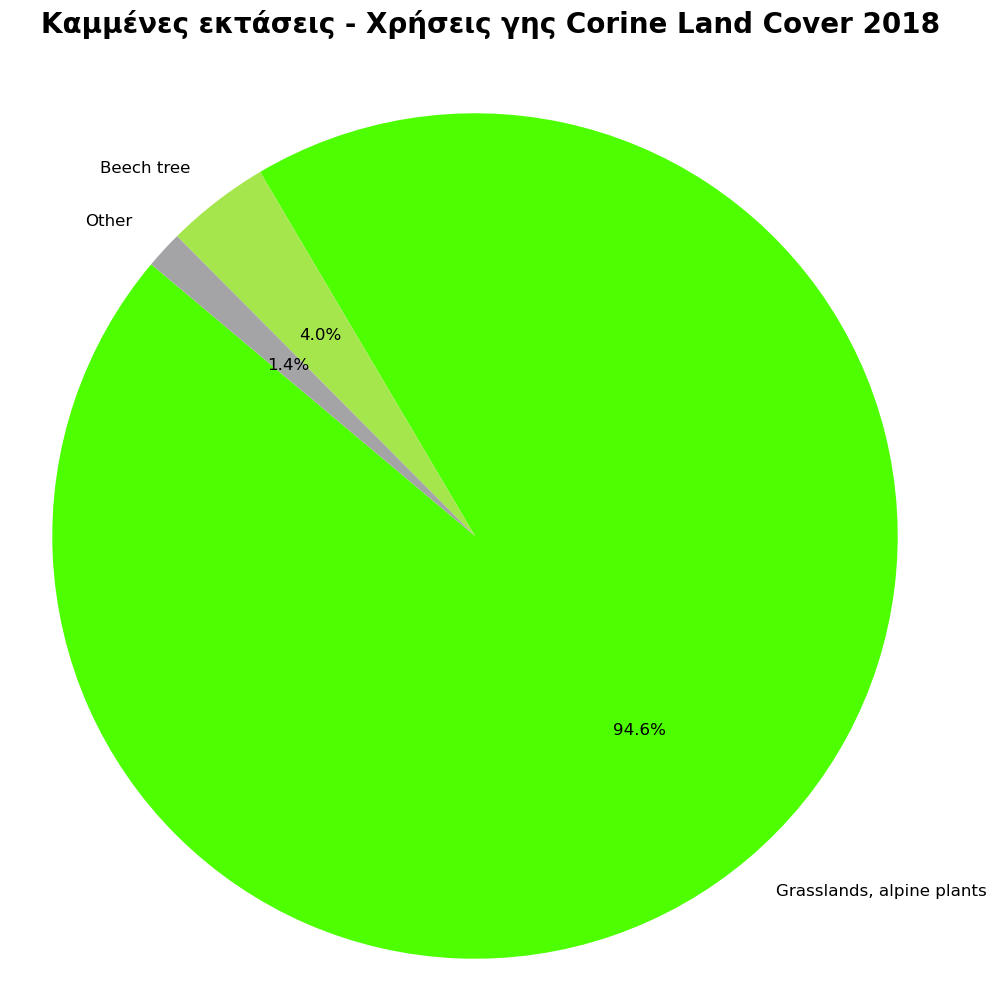

In [32]:
pie_chart(percentage, colors, labels, os.path.basename(file_path).replace(".csv", ".png"))

In [33]:
def create_legend(labels_d, colors_d, removed_labels):
    
    # Initialize a new list to store the updated labels
    updated_labels = []
    # Filter out labels from removed_labels that are already in labels_d
    # This ensures that only truly removed labels are appended to "Other"
    removed_labels = [label for label in removed_labels if label not in labels_d]
    print(removed_labels)
    # If the label is "Other", append it with the removed labels in parentheses
    # Otherwise, just add the label to the updated_labels list as is
    for label in labels_d:
        if label == "Other":
            # Append "Other" with removed labels in parentheses
            updated_labels.append(f"{label} ({', '.join(removed_labels)})")
        else:
            updated_labels.append(label)
            
    # Create legend
    fig, ax = plt.subplots(figsize=(6, 6))
    patches = [
        plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
        for label, color in zip(updated_labels, colors_d)
    ]
    legend = ax.legend(
        handles=patches,
        loc='center',
        fontsize=12,
        title="Κατηγορίες Χρήσης Γης",
        shadow=False
    )
    legend.set_title("Affected LULC Categories", prop={'size': '14', 'weight': 'bold'})
    ax.axis('off')  # Απενεργοποίηση των αξόνων
    plt.show()

['Bushes', 'Black pine', 'Oak', 'Barren grasslands']


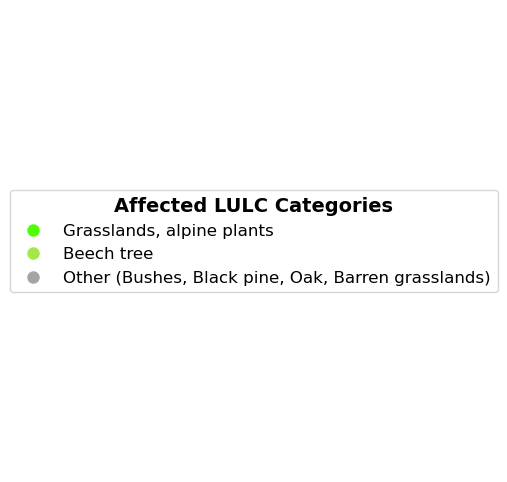

In [34]:
create_legend(labels, colors, removed_labels)

In [35]:
def combined_pie_and_legend(percentage_d, colors_d, labels_d, removed_labels, path_file):
    fig = plt.figure(figsize=(12, 8))  # Size of the entire figure
    gs = GridSpec(1, 2, width_ratios=[2, 1])  # 1 row, 2 columns; first column 2 times wider than the second

    # Pie chart
    ax1 = fig.add_subplot(gs[0]) # First subplot for the pie chart
    ax1.pie(
        percentage_d,
        colors=colors_d,
        #labels=labels_d,
        startangle=140,
        autopct='%1.1f%%',
        textprops={'family': 'sans-serif', 'fontsize': 12}
    )
    """
    ax1.set_title(
        "Καμμένες εκτάσεις - Χρήσεις γης Corine Land Cover 2018",
        fontdict={'family': 'sans-serif', 'fontsize': 20, 'fontweight': 'bold'},
        loc='center',
        pad=30
    )
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    """

    # Initialize a new list to store the updated labels
    updated_labels = []
    # Filter out labels from removed_labels that are already in labels_d
    # This ensures that only truly removed labels are appended to "Other"
    removed_labels = [label for label in removed_labels if label not in labels_d]
    # If the label is "Other", append it with the removed labels in parentheses
    # Otherwise, just add the label to the updated_labels list as is
    for label in labels_d:
        if label == "Other":
            # Append "Other" with removed labels in parentheses
            updated_labels.append(f"{label} ({', '.join(removed_labels)})")
        else:
            updated_labels.append(label)

    # Legend
    ax2 = fig.add_subplot(gs[1])
    patches = [
        plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
        for label, color in zip(updated_labels, colors_d)
    ]
    legend = ax2.legend(
        handles=patches,
        loc='center',
        fontsize=12,
        shadow=False
    )

    legend.set_title("Affected LULC Categories", prop={'size': '14', 'weight': 'bold'})
    ax2.axis('off')  # Turn off the axis

    # Adjusting the layout to control positions
    plt.subplots_adjust(left=0.05, right=0.90, top=0.9, bottom=0.1, wspace=0.0)

    # Set the title for the whole figure
    fig.suptitle(
        "Affected LULC Categories",
        fontsize=20,
        fontweight='bold',
        family='sans-serif',
        y=0.95  # Adjust this value to move the title up or down
        #x=0.55  # Adjust this value to move the title left or right
    )
    # Save the figure
    plt.savefig(path_file, format='png', bbox_inches='tight', transparent=False)
    plt.show()

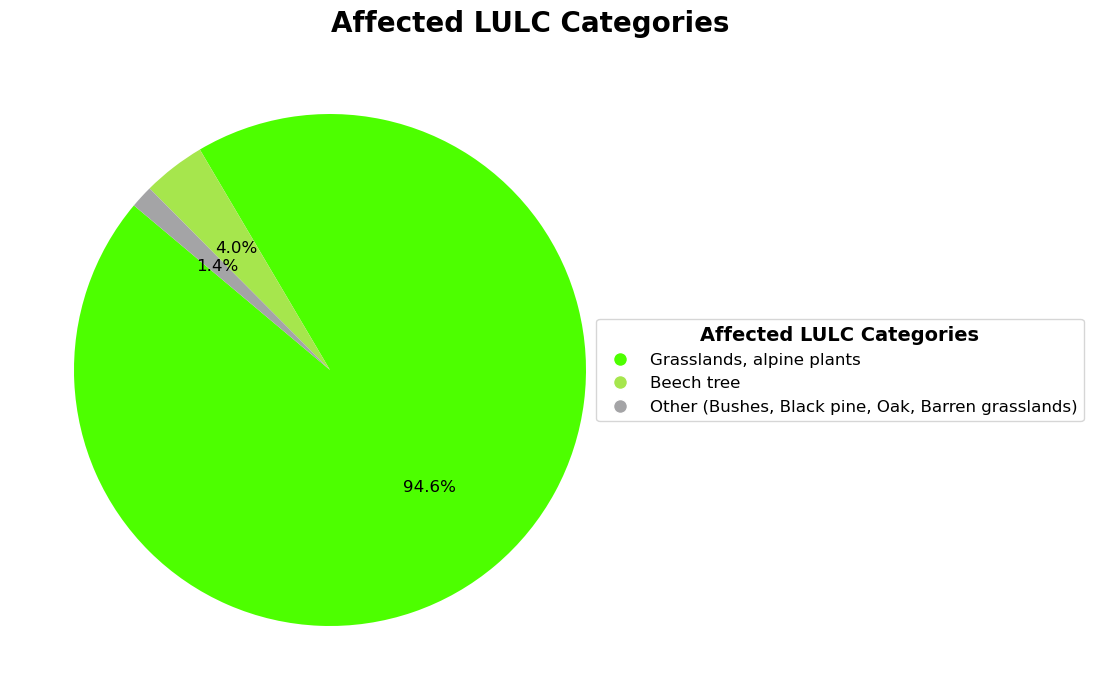

In [36]:
combined_pie_and_legend(percentage, colors, labels, removed_labels, os.path.basename(file_path).replace(".csv", ".png"))